In [1]:
import pandas as pd

data = pd.read_csv("yangi_data_set2 - yangi_data_set2.csv")

data['target'] = data['target'].replace({'Presence': 1, 'Absence': 0})

data.to_csv("updates_dataset.csv", index=False)

print(data.info())

#salom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                150 non-null    int64  
 1   Gender             150 non-null    int64  
 2   Heart_Rate, Pulse  150 non-null    int64  
 3   SystBP             150 non-null    int64  
 4   DiasBP             150 non-null    int64  
 5   Height (sm)        150 non-null    int64  
 6   Weight (kg)        150 non-null    int64  
 7   HTN                150 non-null    int64  
 8   Smoking            150 non-null    int64  
 9   FHHD               150 non-null    int64  
 10  Obesity            150 non-null    int64  
 11  Diabetes           150 non-null    int64  
 12  Hemoglobin, HGB    150 non-null    float64
 13  target             150 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 16.5 KB
None


C:\Users\BOBOMUROT\AppData\Local\Temp\ipykernel_7256\2585086755.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['target'] = data['target'].replace({'Presence': 1, 'Absence': 0})


In [3]:
data.head(14)
data.describe()

,Age,Gender,"Heart_Rate, Pulse",SystBP,DiasBP,Height (sm),Weight (kg),HTN,Smoking,FHHD,Obesity,Diabetes,"Hemoglobin, HGB",target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,53.826667,0.673333,79.740000,134.093333,73.326667,171.006667,78.853333,0.720000,0.233333,0.326667,2.660000,0.206667,14.374667,0.453333
std,9.118715,0.470565,12.189461,28.595852,13.426157,12.271261,22.466197,0.450503,0.424370,0.470565,1.022105,0.406271,1.508241,0.499485
min,29.000000,0.000000,60.000000,80.000000,50.000000,150.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.100000,0.000000
25%,47.000000,0.000000,69.250000,107.000000,65.000000,160.000000,62.000000,0.000000,0.000000,0.000000,2.000000,0.000000,13.400000,0.000000
50%,54.000000,1.000000,80.000000,138.500000,73.000000,171.000000,74.000000,1.000000,0.000000,0.000000,3.000000,0.000000,14.250000,0.000000
75%,59.750000,1.000000,90.750000,159.000000,79.000000,182.000000,85.000000,1.000000,0.000000,1.000000,4.000000,0.000000,15.100000,1.000000
max,77.000000,1.000000,100.000000,170.000000,109.000000,190.000000,140.000000,1.000000,1.000000,1.000000,4.000000,1.000000,18.500000,1.000000


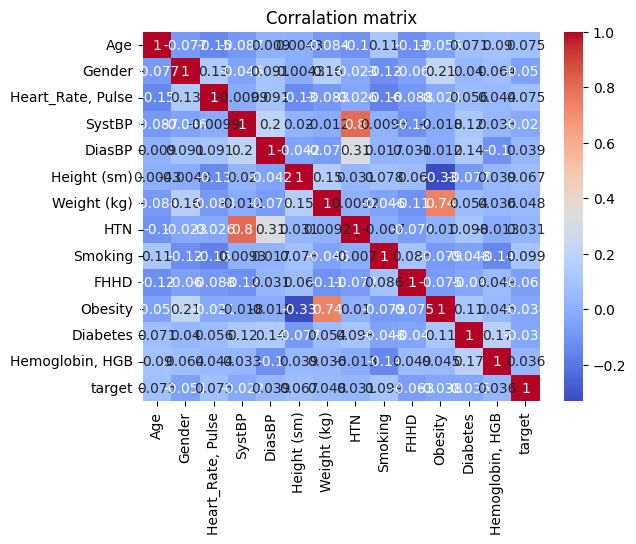

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corralation matrix")
plt.show()

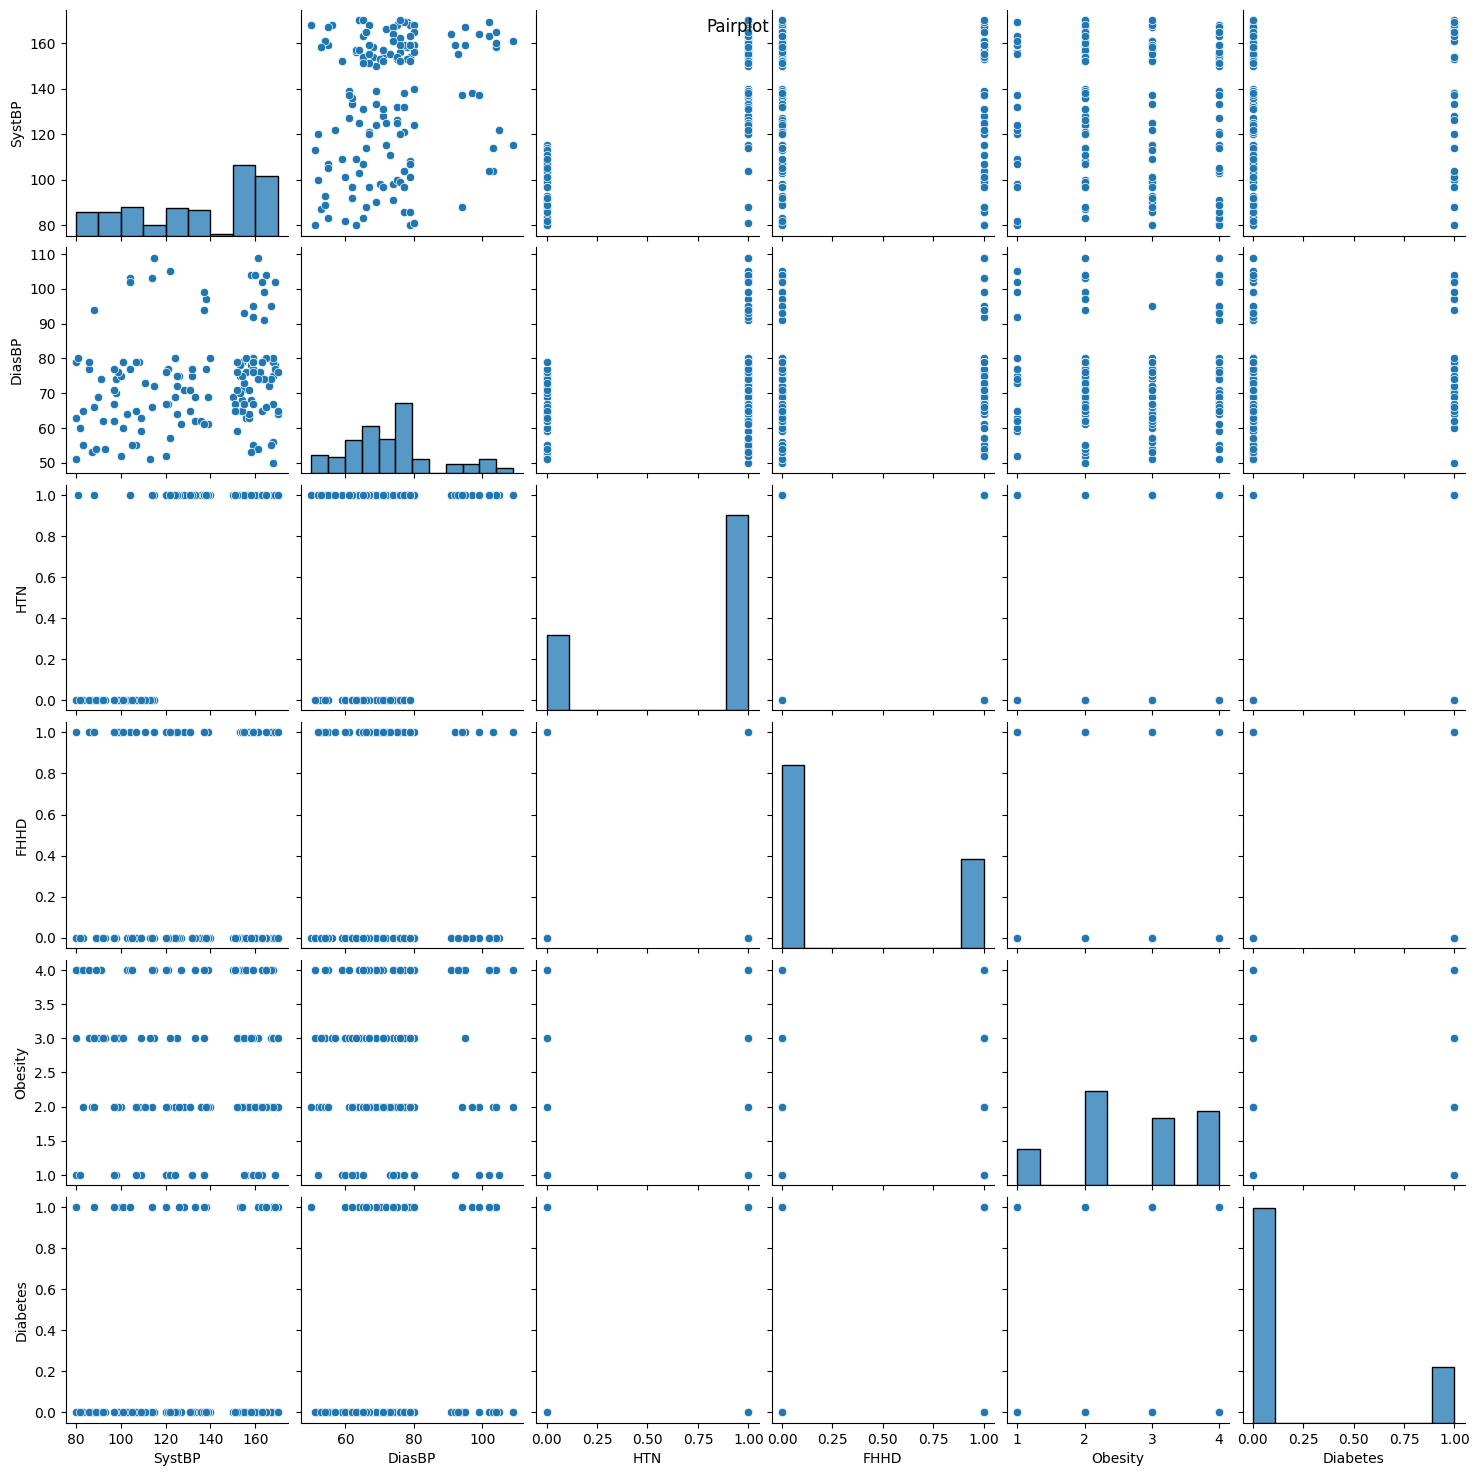

In [6]:
selected_features = ['SystBP', 'DiasBP', 'HTN', 'FHHD', 'Obesity', 'Diabetes']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot')
plt.show()

# Linear regression Lesson 6

In [8]:
X = data[['SystBP']] # input data
y = data['target'] # output data

y.shape

(150,)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)


model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mas = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'Mean absolute error: {mas}')
print(f"R-squared error: {r2}")

(120, 1) (30, 1)
Mean squared error: 0.24802192573287726
Mean absolute error: 0.49610361104214457
R-squared error: -0.033424690553655045
